In [1]:
!pip install transformers

In [2]:
from transformers import pipeline

In [3]:
sentiment=pipeline("sentiment-analysis",device=0)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [4]:
sentiment("this movie is good")

[{'label': 'POSITIVE', 'score': 0.9998586177825928}]

In [5]:
sentiment("this movie is not good")

[{'label': 'NEGATIVE', 'score': 0.9997900128364563}]

In [6]:
from google.colab import drive

In [7]:
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
file_path="/content/drive/MyDrive/practice/data.csv"

In [9]:
import pandas as pd

In [10]:
data=pd.read_csv(file_path)

In [11]:
data[:5]

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


<Axes: >

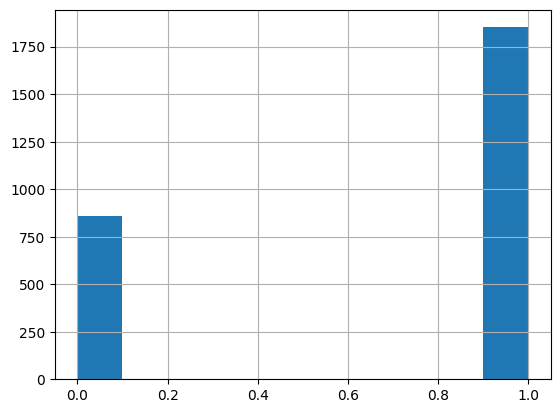

In [19]:
data.Sentiment.hist()

In [12]:
data["Sentiment"]=data["Sentiment"].map({"positive":1,"negative":0})
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,1.0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0.0
2,"For the last quarter of 2010 , Componenta 's n...",1.0
3,According to the Finnish-Russian Chamber of Co...,NaN
4,The Swedish buyout firm has sold its remaining...,NaN


In [13]:
data.dropna(inplace=True)
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,1.0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0.0
2,"For the last quarter of 2010 , Componenta 's n...",1.0
5,$SPY wouldn't be surprised to see a green close,1.0
6,Shell's $70 Billion BG Deal Meets Shareholder ...,0.0


In [14]:
data.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

In [15]:
data.Sentiment.head()

0    1.0
1    0.0
2    1.0
5    1.0
6    0.0
Name: Sentiment, dtype: float64

In [16]:
text=data.Sentence.tolist()
text

["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",
 '$ESI on lows, down $1.50 to $2.50 BK a real possibility',
 "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",
 "$SPY wouldn't be surprised to see a green close",
 "Shell's $70 Billion BG Deal Meets Shareholder Skepticism",
 'SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its results to remain at loss for the full year .',
 "Kone 's net sales rose by some 14 % year-on-year in the first nine months of 2008 .",
 'Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .',
 '$SAP Q1 disappoints as #software lice

In [17]:
predictions=sentiment(text)

In [21]:
pd.DataFrame(predictions).head()

,label,score
0,POSITIVE,0.999175
1,NEGATIVE,0.993126
2,NEGATIVE,0.993958
3,POSITIVE,0.750171
4,NEGATIVE,0.924202


In [22]:
probs=[i["score"] if i["label"].startswith("P") else 1-i["score"] for i in predictions]

In [23]:
probs

[0.9991747736930847,
 0.006873965263366699,
 0.0060416460037231445,
 0.7501708269119263,
 0.07579761743545532,
 0.0003688335418701172,
 0.9766584038734436,
 0.9963717460632324,
 0.0005992650985717773,
 0.6208169460296631,
 0.0036917924880981445,
 0.011432170867919922,
 0.976690948009491,
 0.9572044610977173,
 0.41744518280029297,
 0.20862412452697754,
 0.999650239944458,
 0.5402374267578125,
 0.0030595064163208008,
 0.0004432797431945801,
 0.0014800429344177246,
 0.0004290938377380371,
 0.0041321516036987305,
 0.6448270678520203,
 0.08664286136627197,
 0.0716012716293335,
 0.8954818248748779,
 0.9952623844146729,
 0.02386718988418579,
 0.9995203018188477,
 0.01730060577392578,
 0.9946730732917786,
 0.02123159170150757,
 0.00038760900497436523,
 0.011242568492889404,
 0.0015780925750732422,
 0.0024906396865844727,
 0.9967396855354309,
 0.0006476044654846191,
 0.013332664966583252,
 0.9676129221916199,
 0.00470733642578125,
 0.3097550868988037,
 0.00029653310775756836,
 0.092684149742126